In [1]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

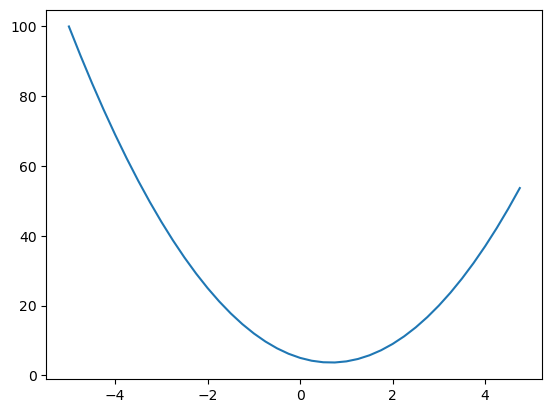

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
# what is the derivative? 

h = 0.001
x = 3.0
f(x)

20.0

In [6]:
f(x + h) # slightly greater than 20, h will nudge it higher and function will respond positively

20.014003000000002

In [7]:
f(x + h) - f(x) # how much the function responded in a positive direction 

0.01400300000000243

In [8]:
(f(x + h) - f(x))/h # normalise by the run to get the slope

14.00300000000243

In [9]:
# What happens to the slope at -3 

## Slope will be negative

h = 0.001
x = -3.0
(f(x + h) - f(x))/h 

-21.996999999998934

In [10]:
# The slope at 0

h = 0.001
x = 2/3 # at this point slope is 0
(f(x + h) - f(x))/h 

0.0029999999995311555

In [11]:
# Adding more variables

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# evaluate derivative (d) with respect to (a)
d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # a will be slightly more positive, multiplied by a negative b. Then c adds less, so end up with a slighly lower number. d1 > d2
print('slope', (d2 - d1)/h) # a negative number as d1 > d2

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:
# evaluate derivative (d) with respect to (b)
d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # b will be more positive, thus a*b will will be more positive. Add c, result in a slightly higher number where d2 > d1. 
print('slope', (d2 - d1)/h) # a positive number as d2 > d1

d1 3.999699999999999
d2 3.99990001
slope 2.0001000000124947


In [14]:
# evaluate derivative (d) with respect to (c)
d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # a*b unaffected. C a bit higher, result in a slightly bit higher number where d2 > d1. It has gone up by the value of what we added to c.
print('slope', (d2 - d1)/h) # slope is 1 

d1 3.99990001
d2 4.00000001
slope 0.9999999999976694


Build out a value object

In [15]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string
        return f"Value(data={self.data})"
    
a = Value(2.0)

In [16]:
a = Value(2.0)
b = Value(-3)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

Modify to add 2 value objects

In [17]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
a = Value(2.0)
b = Value(-3)
a + b
a.__add__(b)

Value(data=-1.0)

Implement multiply

In [18]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
    
    
a = Value(2.0)
b = Value(-3)
a * b
c = Value(10)
a*b + c
#a.__mul__(b).__add__(c)

Value(data=4.0)

Keep pointers to values

In [19]:
class Value:

    def __init__(self, data, _children=()): # add empty variable "children"
        self.data = data
        self._prev = set(_children) # _prev will be empty set

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out
    
    
a = Value(2.0)
b = Value(-3)
c = Value(10)

d = a*b + c
d

Value(data=4.0)

In [20]:
d._prev

{Value(data=-6.0), Value(data=10)}

Allow to see what operation was involved

In [21]:
class Value:

    def __init__(self, data, _children=(), _op=''): 
        self.data = data
        self._prev = set(_children) # _prev will be empty set
        self._op  = _op

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0)
b = Value(-3)
c = Value(10)

d = a*b + c
d

Value(data=4.0)

Visualise expression code:

In [22]:
import graphviz

In [23]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

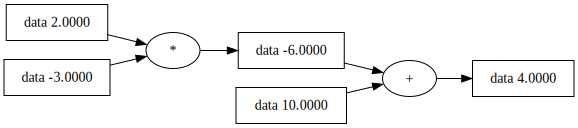

In [24]:
# Visualise 
draw_dot(d)

### *Add labels* 

In [25]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self._prev = set(_children) # _prev will be empty set
        self._op  = _op
        self.label = label

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = a*b + c; d.label = 'd'
f = Value(-2.0, label= 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [26]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

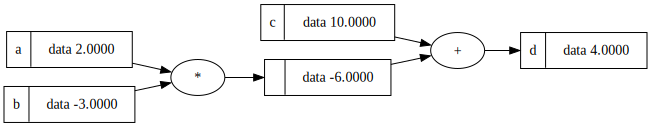

In [27]:
draw_dot(d)

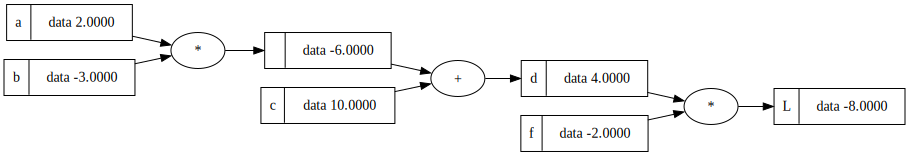

In [28]:
draw_dot(L)

Backpropogation

In [48]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [46]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

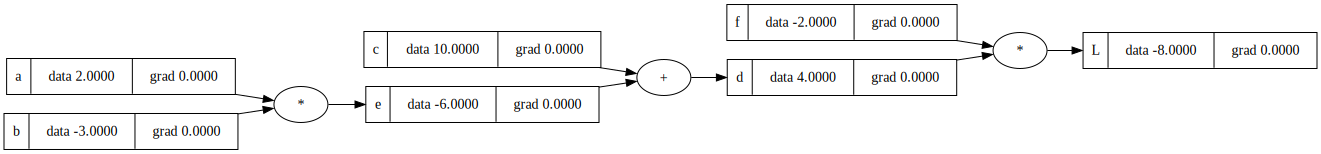

In [49]:
draw_dot(L)

In [50]:
def lol():

    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = a*b + c; d.label = 'd'
    f = Value(-2.0, label= 'f')
    L = d * f; L.label = 'L'
    L1 = L

    a = Value(2.0 +  h, label='a') # derivative in respect to (a) (added + h)
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = a*b + c; d.label = 'd'
    f = Value(-2.0, label= 'f')
    L = d * f; L.label = 'L'
    L2 = L

    print((L2.data - L1.data)/h)
lol()

6.000000000021544


In [51]:
# change L2 by h


def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data + h
  
  print((L2 - L1)/h)
  
lol()

1.000000000000334


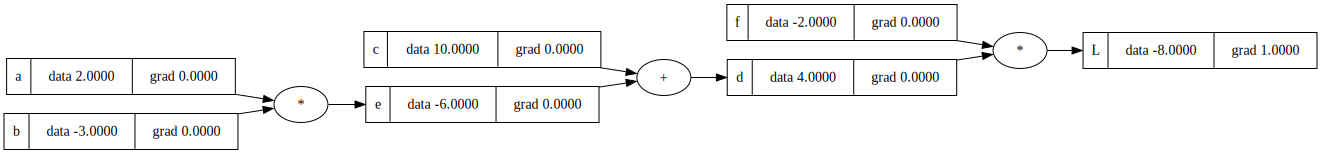

In [52]:
# Change L grad 
L.grad = 1.0
draw_dot(L)

#### *Local derivative at a multiplication node:*

> L = d * f

> dL/dd =? f

> (f(x+h)-f(x))/h

> ((d+h)*f - d*f)/h

> (d*f + h*f - d*f)/h

> (h*f)/h

> f

Thus, dL/dd = f = 4.0


In [53]:
f.grad = 4.0 # is a value of d = 4
d.grad = -2 # is a value of f = -2

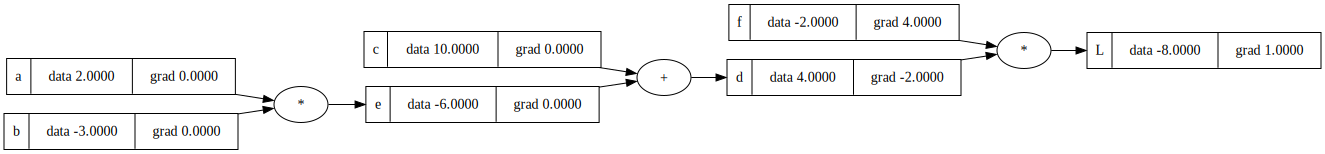

In [54]:
draw_dot(L)

In-line gradient check: derivate in respect to f

In [55]:
# derivate in respect to f

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0 +h, label='f') # derivate in respect to f
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

3.9999999999995595


In-line gradient check: derivate in respect to d

In [56]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f') # derivate in respect to f
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

-2.000000000000668


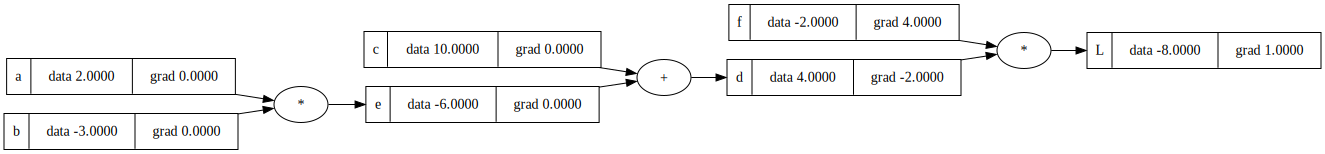

In [57]:
draw_dot(L)

#### *Local derivative at an addition node:*

- Need to derive L in respect to c
- dL / dc 
- also figure out dL / de
- we know the impact of c on d, and d on L 
- so we should be able to figure out how c impacts L

1. What is the local derivative of d in respect to c:

> dd / dc

> d = c + e 

> (f(x+h) - f(x)) / h

- focus on c and it's effect on d

> ((c+h + e) - (c+e) ) / h

> (c + h + e - c - e)/h

> h/h

> 1.0

> dd / dc = 1.0

- By same logic dd / de = 1.0


**Chain rule** 

- Want: dL / dc 

- Know:
> dL / dd = -2
> dd / dc = 1

> dL / dc = (dL / dd) * (dd / dc)
>         = -2 * 1.0 

Set the c and e grad:

In [58]:
c.grad = -2.0
e.grad = -2.0

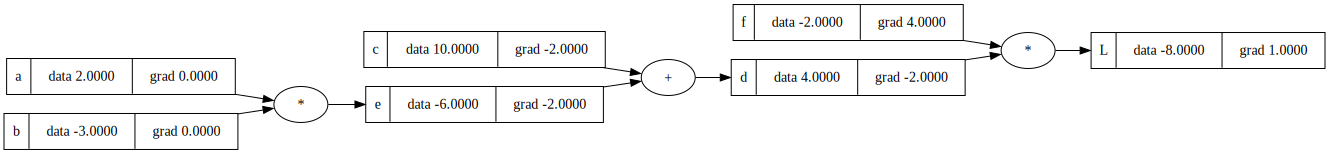

In [59]:
draw_dot(L)

Verify:

In [60]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  c.data += h # expect to see -2 and also the same if done for e.data
  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f') 
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

-1.9999999999988916


#### *Second application of chain rule* 

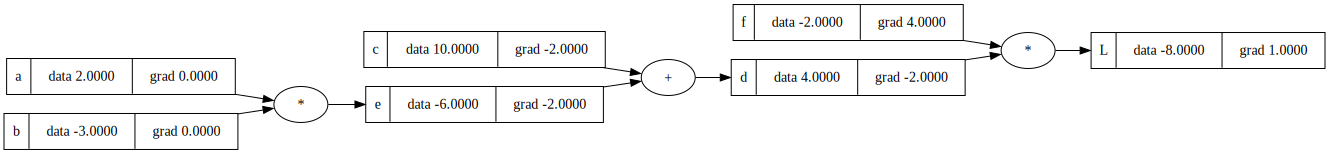

In [61]:
draw_dot(L)

- dL / de = -2.0
- dL / da = (dL / de) * (de / da)

- Multiplication node local gradient:
> e = a * b 

> de / da ? b (from previous proof) : 

In [66]:
a.grad = (-2.0 * -3.00) # chain rule  = (dL / de = -2.0) * b 
b.grad = (-2.0 * 2.00) # chain rule  = (dL / de = -2.0) * a

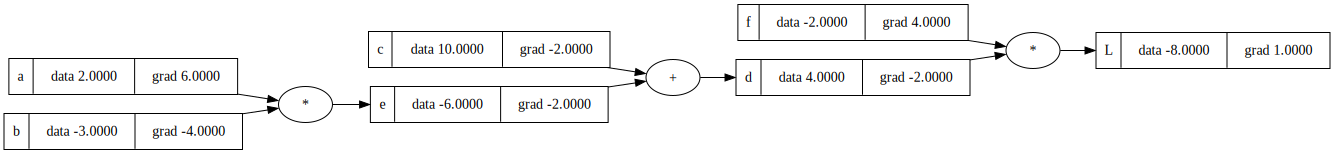

In [67]:
draw_dot(L)

Verify:

In [69]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h # expect to see -4
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')

  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f') 
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

3.9999999999995595


### Summary notes

- Manual backpropogation 
- Iterated through each node one by one and locally applied the chain rule 
- How the operation affected the child nodes
- We recursively applied the chain rule backwards through the application graph

### Nudge inputs to make L increase

In [71]:
a.grad += 0.01 * a.grad
b.grad += 0.01 * b.grad
c.grad += 0.01 * c.grad
f.grad += 0.01 * f.grad

# expect a positive influence on L, and become less negative
# also re-run the forward pass:

e = a * b
d = e + c
L = d * f

print(L.data)

-8.0


### Another example of backpropogation: through a neuron

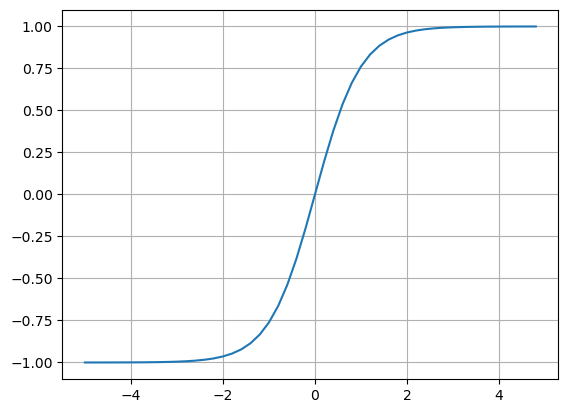

In [72]:
# activation function with tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();
